<a href="https://colab.research.google.com/github/laisfernandes/aula_data_exploratory/blob/main/Atividade_3_Representa%C3%A7%C3%A3o_de_Vari%C3%A1veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXERCÍCIO REPRESENTAÇÃO DE VARIÁVEIS**

In [7]:
# Importando o pandas

import pandas as pd

# Importando arquivo csv
caminho_arquivo = '/content/drive/My Drive/Aula_Data_Exploratory/DNSE2017.csv'

# Lendo o arquivo 
sinasc = pd.read_csv(caminho_arquivo, dtype=str)

campos_float = ['PESO']
campos_int = ['IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'QTDFILMORT', 'APGAR1', 'APGAR5', 'SEMAGESTAC', 'CONSPRENAT', 'SERIESCMAE', 'QTDPARTCES', 'QTDPARTNOR', 'QTDGESTANT']

def transforma_dados(df, campos_float, campos_int):
  for c in campos_float:
    df[c] = pd.to_numeric(df[c])
  for c in campos_int:
    df[c] = pd.to_numeric(df[c]).astype(pd.Int64Dtype())
  return df
  
sinasc = transforma_dados(sinasc, campos_float, campos_int)

sinasc

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2415631,230440,1,24,2,4,999992,1,0,280030,5,1,2,4,10012017,1413,1,9,10,4,3556.0,2,16012017,NaN,20170003,3.2.01,07022017,028,NaN,823,230075,23,3,<NA>,08011993,4,1,0,1,<NA>,NaN,40,9,10,NaN,1,2,1,1,NaN,0,NaN,12,0,1,NaN,05,1,9
1,2,1,2005050,270030,1,34,5,4,622020,3,1,280600,5,1,2,3,05042017,1425,1,8,9,4,2760.0,2,03072017,NaN,20170020,3.2.01,26072017,112,NaN,827,270400,27,3,3,06011983,4,4,3,<NA>,<NA>,14072016,37,8,5,03,1,2,2,1,NaN,3,05042017,06,0,1,NaN,03,1,3
2,3,1,2005050,270030,1,19,2,4,622020,<NA>,<NA>,280120,NaN,1,2,4,03042017,1250,1,8,9,4,3010.0,2,17042017,NaN,20170011,3.2.01,20042017,017,NaN,827,270030,27,3,3,21081997,4,<NA>,<NA>,<NA>,26,NaN,<NA>,NaN,8,01,1,1,2,1,NaN,3,03042017,06,0,1,NaN,11,0,5
3,4,1,2005026,270030,1,19,2,4,999992,1,<NA>,280440,5,1,2,3,29042017,1615,2,8,9,4,3720.0,2,17052017,NaN,20170015,3.2.01,18052017,019,NaN,827,270170,27,2,8,10041998,4,1,<NA>,1,<NA>,08082016,37,8,4,04,1,1,1,1,2,3,29042017,04,0,1,NaN,05,1,2
4,5,1,2722429,270400,1,16,1,4,999991,0,4,280570,5,1,1,3,19042017,1014,1,9,10,4,2900.0,2,06062017,NaN,20170007,3.2.01,06062017,048,NaN,828,280030,28,3,1,30082000,4,0,0,0,<NA>,20072016,38,8,5,05,1,2,3,3,2,4,19042017,05,0,1,NaN,03,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33862,33863,1,2115891,314480,1,31,2,5,121010,1,0,280030,4,1,2,4,22092017,0210,1,6,7,1,2735.0,2,31102017,NaN,20170023,3.2.01,16112017,055,NaN,828,280030,28,5,<NA>,05091986,1,1,0,1,35,NaN,36,1,7,02,1,2,2,1,5,4,27092017,08,0,1,NaN,10,1,5
33863,33864,1,3137163,350610,1,26,2,4,376225,0,0,280030,5,1,2,3,15102017,0335,1,8,9,1,3230.0,2,13112017,NaN,20170021,3.2.01,16112017,032,NaN,827,270260,27,3,3,11111990,1,0,0,0,31,NaN,39,2,5,02,1,2,1,1,2,3,15102017,06,0,1,NaN,02,0,3
33864,33865,1,2755092,353800,1,26,1,5,999992,0,1,280030,5,1,2,4,24102017,1343,1,9,9,1,3640.0,2,01112017,NaN,20170045,3.2.01,08112017,015,NaN,835,354230,35,5,<NA>,03101991,1,1,0,0,28,NaN,40,1,11,01,1,2,1,1,5,4,24102017,08,0,1,NaN,04,1,5
33865,33866,1,2077574,355030,1,33,1,4,999992,1,0,280580,5,1,1,4,21082017,0828,1,8,9,4,3115.0,2,30082017,NaN,20170036,3.2.01,04092017,014,NaN,835,355030,35,3,2,15041984,4,1,1,0,38,NaN,39,1,7,01,1,1,3,1,5,4,21082017,05,0,1,NaN,04,1,5


1) Fazer o boxplot para idade da mãe e encontrar quais os registro de outliers.


,IDADEMAE
22,47
3110,47
3575,47
3922,49
8371,48
12520,47
17054,47
18699,48
20801,50
23171,47


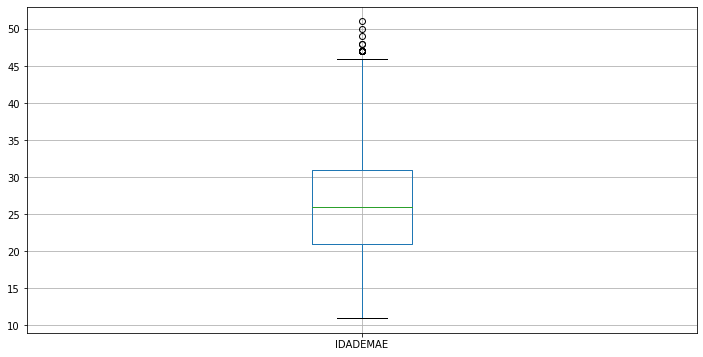

In [19]:
bpidade = sinasc.boxplot(column=['IDADEMAE'], figsize=(12,6))
bpidade.tick_params(colors='black')
bpidade.xaxis.label.set_color('white')
bpidade.yaxis.label.set_color('white')

q_idade = sinasc.IDADEMAE.quantile([0.25, 0.75]).values
limit_inf = q_idade[0] - (q_idade[1] - q_idade[0]) * 1.5
limit_sup = q_idade[1] + (q_idade[1] - q_idade[0]) * 1.5

sinasc_outliers = sinasc[(sinasc.IDADEMAE < limit_inf) | (sinasc.IDADEMAE > limit_sup)]
sinasc_outliers[['IDADEMAE']]

2) Fazer o boxplot para o peso da criança e encontrar quais os registro de outliers.


,PESO
30,1455.0
76,5570.0
119,4630.0
146,1830.0
147,1740.0
...,...
33783,1520.0
33817,4600.0
33826,4800.0
33833,5190.0


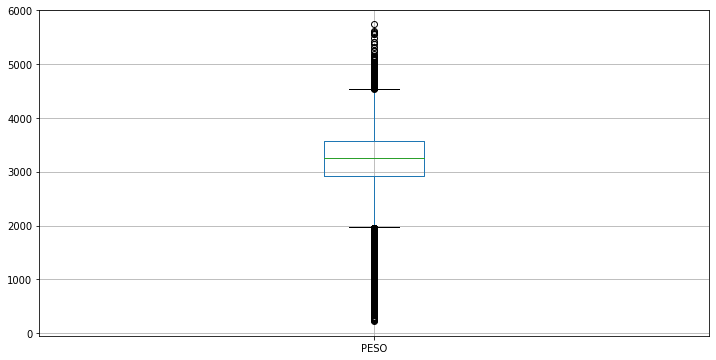

In [20]:
bppeso = sinasc.boxplot(column=['PESO'], figsize=(12,6))
bppeso.tick_params(colors='black')
bppeso.xaxis.label.set_color('white')
bppeso.yaxis.label.set_color('white')

q_peso = sinasc.PESO.quantile([0.25, 0.75]).values
limit_inf = q_peso[0] - (q_peso[1] - q_peso[0]) * 1.5
limit_sup = q_peso[1] + (q_peso[1] - q_peso[0]) * 1.5

sinasc_outliers = sinasc[(sinasc.PESO < limit_inf) | (sinasc.PESO > limit_sup)]
sinasc_outliers[['PESO']]

3) Fazer o histograma da idade do pai


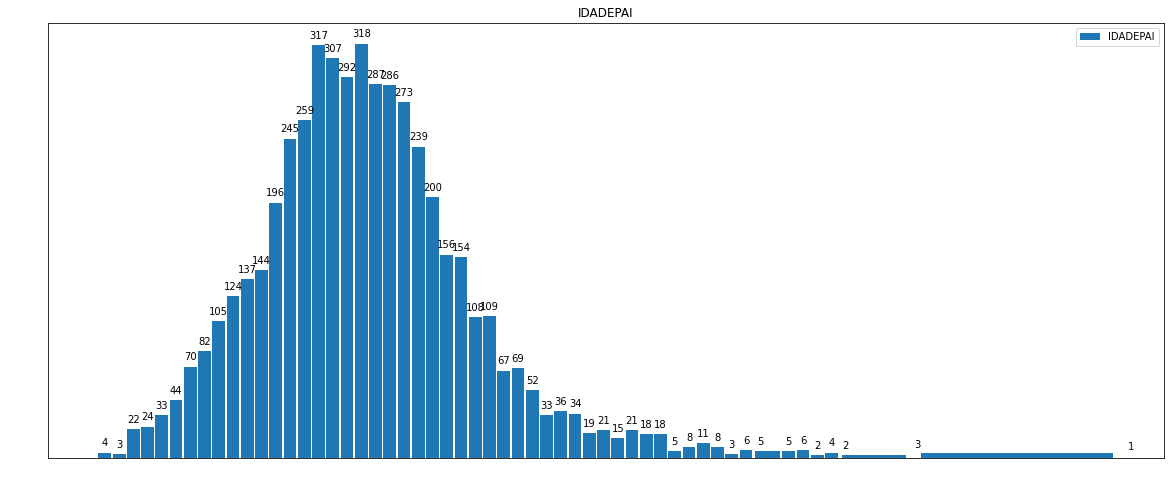

In [23]:
bins_values = sinasc.IDADEPAI.value_counts(sort=False)
hist = sinasc.hist(
    column='IDADEPAI', bins=sorted(bins_values.keys()), grid=False, figsize=(20,8), rwidth=0.9, legend=True
)

hist[0][0].tick_params(colors='white')
hist[0][0].xaxis.label.set_color('white')
hist[0][0].yaxis.label.set_color('white')
r = hist[0][0].set_xlabel('Idade')
r = hist[0][0].set_ylabel('Fequência')
r = hist[0][0].set_ylabel('Fequência')

x_ticks = []
for key, value in bins_values.items():
  x_ticks.append(key)
  hist[0][0].text(key+0.5, value+5, int(value), ha='center')
t = hist[0][0].set_xticks(x_ticks)

4) Representar visualmente os diferentes valores de APGAR1 e APGAR5


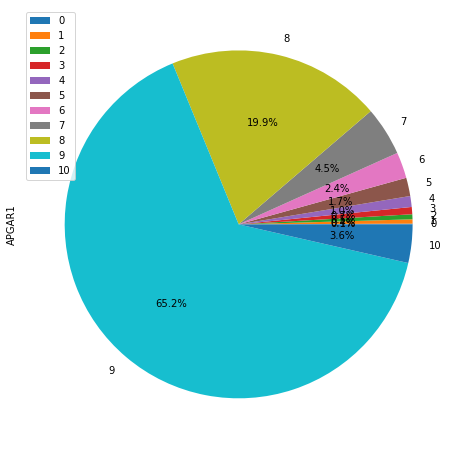

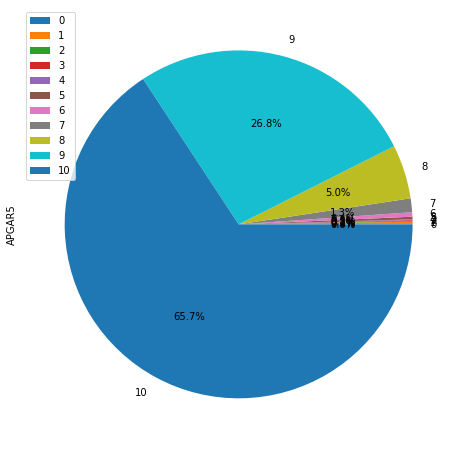

In [27]:
grupo = sinasc.groupby(by='APGAR1').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='APGAR1')

grupo = sinasc.groupby(by='APGAR5').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='APGAR5')

5) Mostrar a dispersão entre idade do pai e idade da mãe


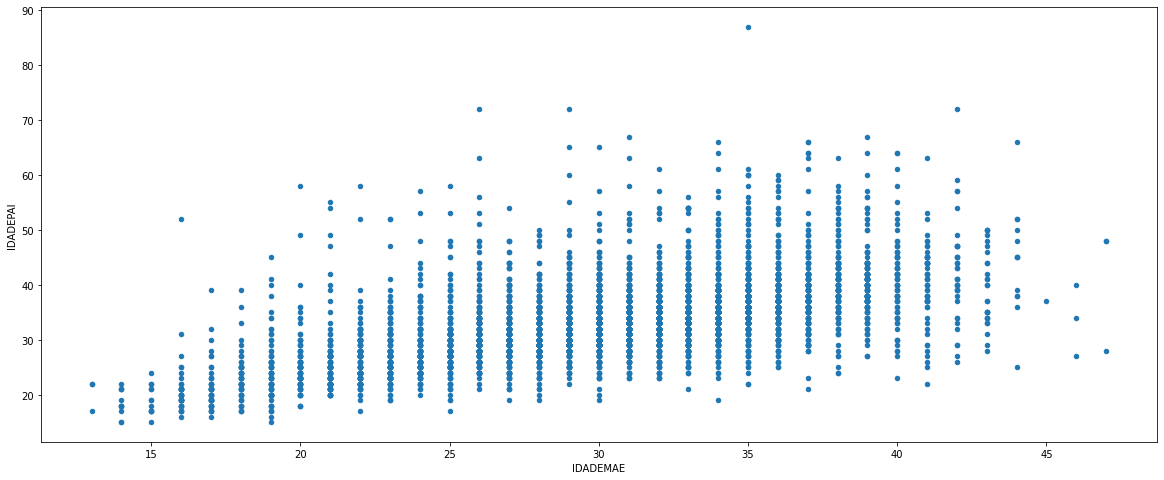

In [32]:
idades = sinasc[(sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
disp = idades.plot(kind='scatter',x='IDADEMAE', y='IDADEPAI', figsize=(20,8))
disp.tick_params(colors='black')
disp.xaxis.label.set_color('black')
disp.yaxis.label.set_color('black')


6) Mostrar visualmente a comparação entre idade da mãe e idade do pai para as mães solteiras com menos de 18 anos


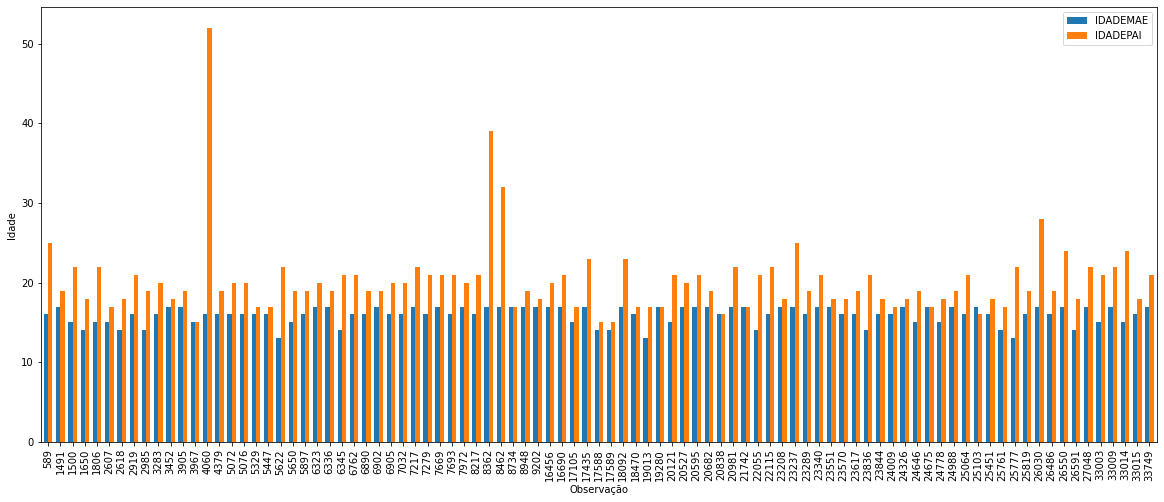

In [34]:
idades = sinasc[(sinasc.IDADEMAE < 18) & (sinasc.ESTCIVMAE== '1') & (sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
barras = idades.plot(kind='bar', width=0.7, figsize=(20,8))
barras.tick_params(colors='black')
barras.xaxis.label.set_color('black')
barras.yaxis.label.set_color('black')
r = barras.set(xlabel='Observação', ylabel='Idade')

7) Comparar a frequência dos anos de escolaridade das mães para que residem na capital (Aracajú, CODMUNRES 2800308) e das mães em outras cidades (outros CODMUNRES).


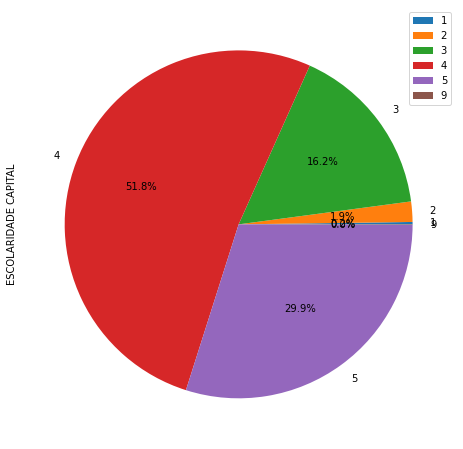

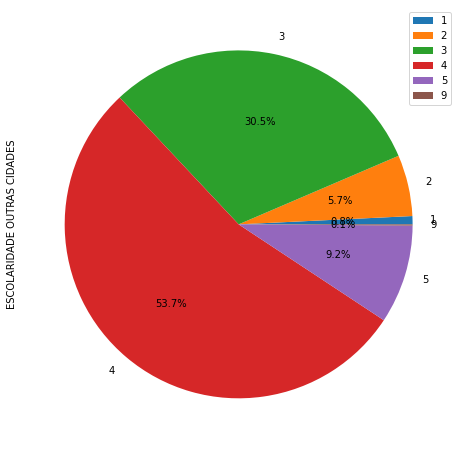

In [39]:
capital = sinasc[sinasc.CODMUNRES == '280030']
outras = sinasc[sinasc.CODMUNRES != '280030']

grupo = capital.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='ESCOLARIDADE CAPITAL')

grupo = outras.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='ESCOLARIDADE OUTRAS CIDADES')